In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import export_graphviz

In [2]:
#utilizamos los datos del titanic que limpiamos en Regresión logística
df = pd.read_csv('titanic_clean.csv')
df.head()

,Unnamed: 0,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,0,3,0,1,0,0,0
1,1,1,1,1,1,0,3,1
2,2,1,3,1,0,0,0,0
3,3,1,1,1,1,0,3,0
4,4,0,3,0,0,0,0,0


In [3]:
X_data = df.drop(['Unnamed: 0', 'Survived'], axis=1)
X_data.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,0,0
1,1,1,1,0,3,1
2,3,1,0,0,0,0
3,1,1,1,0,3,0
4,3,0,0,0,0,0


In [4]:
y_survived = df['Survived']
y_survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [5]:
#separamos nuestros datos de testeo y de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_data, y_survived, test_size=0.3, random_state = 42)

La documentación sobre este modelo se encuentra en https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decision%20tree%20classifier#sklearn.tree.DecisionTreeClassifier

In [6]:
dtcModel = DecisionTreeClassifier(criterion='entropy', random_state = 0)
dtcModel.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [8]:
y_predict = dtcModel.predict(X_test)

In [9]:
#vemos la matriz de confusión de neustro modelo
cm = confusion_matrix(y_test, y_predict)
print(cm)

[[144  13]
 [ 39  72]]


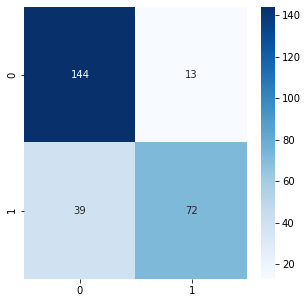

In [10]:
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, fmt='g', cmap='Blues')
plt.show()

In [11]:
#vemos el reporte de nuestro modelo
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       157
           1       0.85      0.65      0.73       111

    accuracy                           0.81       268
   macro avg       0.82      0.78      0.79       268
weighted avg       0.81      0.81      0.80       268



In [12]:
#con graphviz podemos exportar y ver el árbol de clasificación
export_graphviz(dtcModel, out_file ='tree.dot', filled=True, feature_names= ['Pclass','Sex','SibSp', 'Parch','Fare','Embarked']  )

Una vez generado el archivo tree.dot, lo copiamos y pegamos en webgraphviz.com para generar el árbol de clasificación

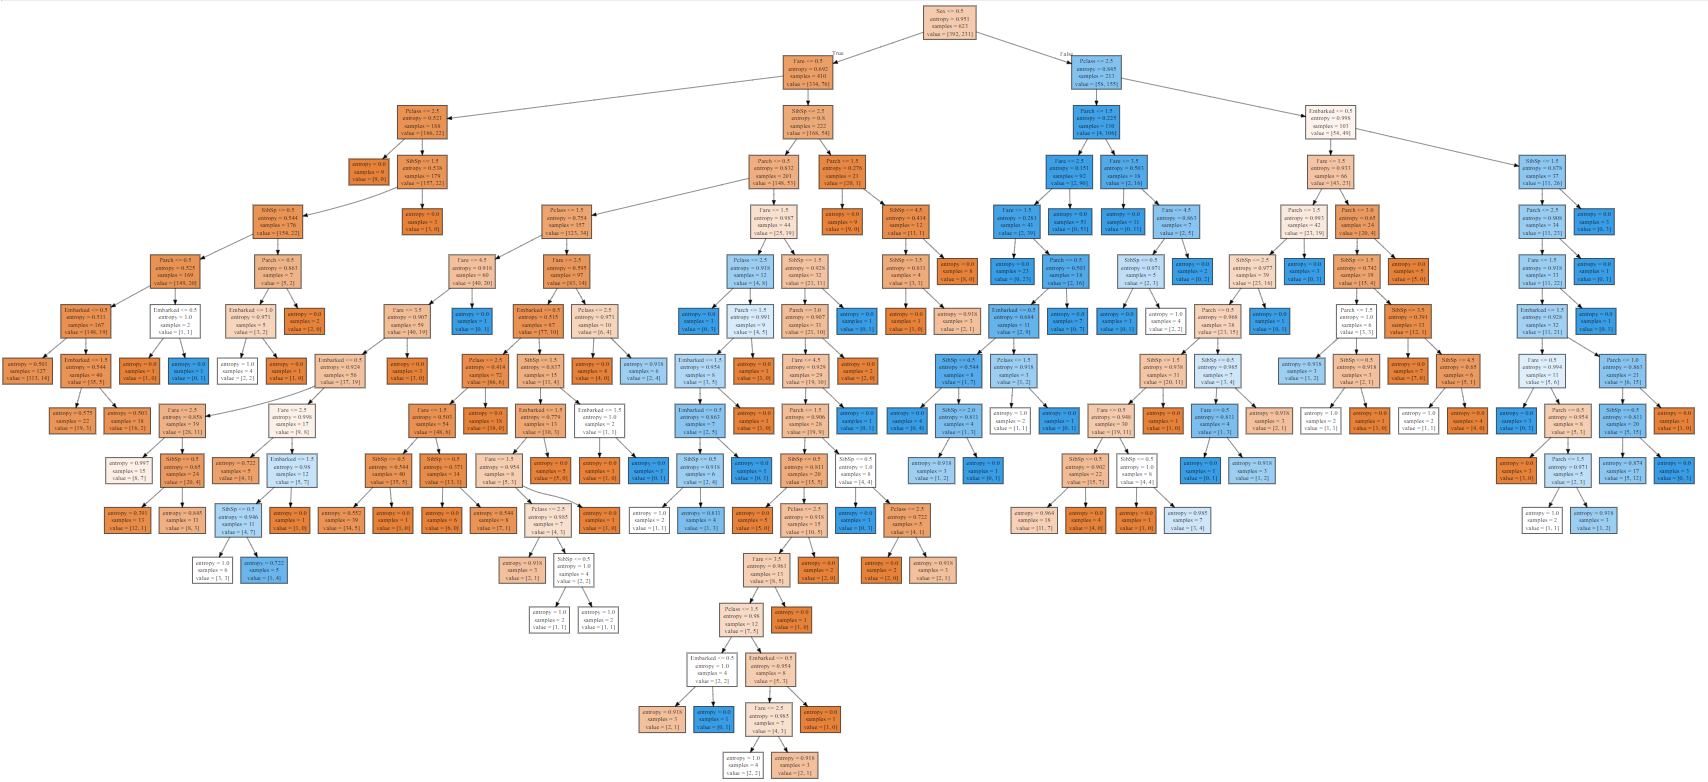